## Exercise 1 - Culinary History

First name: Brian
<br>
Last name: Schweigler
<br>
Matriculation number: 16-102-071

##### Q1: Consider the function plot_trend() used in the lectures. Discover the two ingredients that appear more frequently in the 20th century and in the beginning of the 19th century.


General imports

In [31]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
# import scipy.stats


df = pd.read_csv("data/feeding-america.csv", index_col='date')
def plot_trend(column, df, line_color='grey', xlim=(1810, 1930)):
    slope, intercept, _, _, _ = scipy.stats.linregress(
    df.index, df[column].fillna(0).values)

    ax = df[column].plot(style='o', label=column)
    ax.plot(df.index, intercept + slope * df.index, '--',
    color=line_color, label='_nolegend_')
    ax.set_ylabel("fraction of recipes")
    ax.set_xlabel("year of publication")
    ax.set_xlim(xlim)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


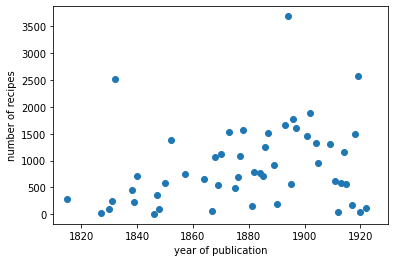

In [32]:
grouped = df.groupby('date')
recipe_counts = grouped.size()
recipe_counts.plot(style='o', xlim=(1810, 1930)) #<AxesSubplot:xlabel='date'> # plot the group size
plt.ylabel("number of recipes")
plt.xlabel("year of publication")
plt.show()

In [33]:
ingredients = df['ingredients'].str.split(';')
groups = ingredients.groupby(ingredients.keys())
ingredients_sum = groups.sum()
most_used_ingredients = ingredients_sum.max()
ingredients_per_annum = ingredients_sum.apply(pd.Series.value_counts)
ingredients_normalized = ingredients_per_annum.divide(recipe_counts, 0)
# group_proportionally = ingredients_normalized.groupby(ingredients_normalized.keys())
# group_proportionally.plot(style='o', xlim=(1810, 1930))

Going by the lecture, we can assume that both baking powder and tomato are the ones that see the sharpest increase in usage.

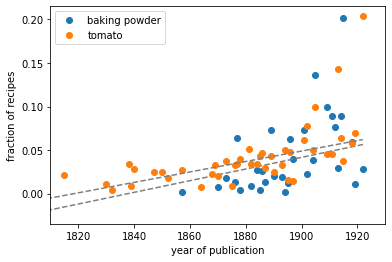

In [34]:
plot_trend('baking powder', ingredients_normalized)
plot_trend('tomato', ingredients_normalized)
plt.legend()
plt.show()

We could compare them to the three generally most used ones like water, currant jelly, and juice.

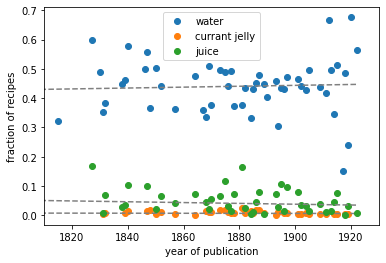

In [35]:
plot_trend('water', ingredients_normalized)
plot_trend('currant jelly', ingredients_normalized)
plot_trend('juice', ingredients_normalized)
plt.legend()
plt.show()

##### Q2: Can you compare the recipes appearing in books published between 1820-1840 with those from the period 1900–1920? Which are for you the main differences?

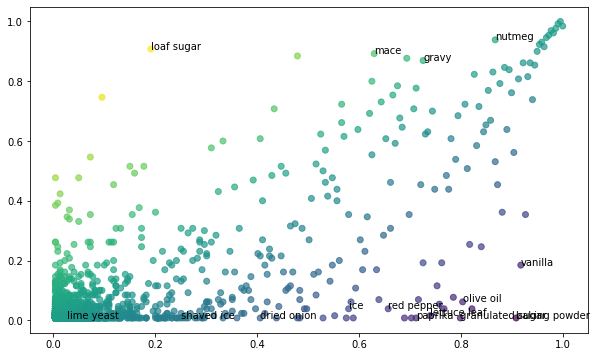

In [49]:
from sklearn.feature_selection import chi2

labels_18 = ['18th century' if 1819 < year < 1841 else 'Unused' for year in ingredients_normalized.index]
labels_19 = ['19th century' if 1899 < year < 1921 else 'Unused' for year in ingredients_normalized.index]

keyness, _ = chi2(ingredients_normalized.fillna(0), labels_18)
keyness_18 = pd.Series(keyness, index=ingredients_normalized.columns).sort_values(ascending=False)
keyness, _ = chi2(ingredients_normalized.fillna(0), labels_19)
keyness_19 = pd.Series(keyness, index=ingredients_normalized.columns).sort_values(ascending=False)

keyness_18.head(n=10)
keyness_19.head(n=10)

# Step 1: compute summed ingredient counts per year (in a matrix date x ingredients)
counts = df['ingredients'].str.split(';').groupby('date').sum().apply(pd.Series.value_counts).fillna(0)

# Step 2: construct two frequency rankings, one pre- and one post-war years

nineteenth_century=counts[np.logical_and(counts.index>1819, counts.index<1841)].sum().rank(method='dense', pct=True)
twentieth_century=counts[np.logical_and(counts.index>1899, counts.index<1921)] .sum().rank(method='dense', pct=True)

# Step 3: merge the pre- and post-war data frames: resulting into two dataframes
rankings=pd.DataFrame({'19th Century': nineteenth_century, '20th Century': twentieth_century})

# Step 4: produce the plot
fig = plt.figure(figsize=(10, 6))
plt.scatter(rankings['20th Century'], rankings['19th Century'],
            c=rankings['19th Century']-rankings['20th Century'],
            alpha=0.7) # c = color
# Add annotations of the 20 most distinctive ingredients
for i, row in rankings.loc[keyness_19.head(15).index].iterrows():
    plt.annotate(i, xy=(row['20th Century'], row['19th Century']))
plt.show()

grouped = df.groupby(level='date')